In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

# Hypothesis Testing

### Chance - Is the Difference in BMI Between Diabetics and Non-Diabetics Legit, or Due to Chance?

We can do some testing to see if this difference is real - the raw averages show a difference, but do we have enough data and enough of a difference to say that there is a real, tangible distinction? First, we can look at the distributions visually. 

#### Load Some Data

In [2]:
df = pd.read_csv("data/diabetes.csv")
df = df[df["BMI"]>10]
df = df[df["BloodPressure"]>10]
dfD = df[df["Outcome"]==1]
dfN = df[df["Outcome"]==0]
dPos = dfD.BMI
dNeg = dfN.BMI
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Select Variables

We will look at the differences in the BMI, between diabetics and non-diabetics. 

In [3]:
#Basics
print("Non-Diabetics mean and median", dNeg.mean(), dNeg.median())
print("Diabetics mean and median", dPos.mean(), dPos.median())

Non-Diabetics mean and median 30.95711297071125 30.4
Diabetics mean and median 35.35099601593622 34.3


<AxesSubplot:xlabel='BMI', ylabel='Density'>

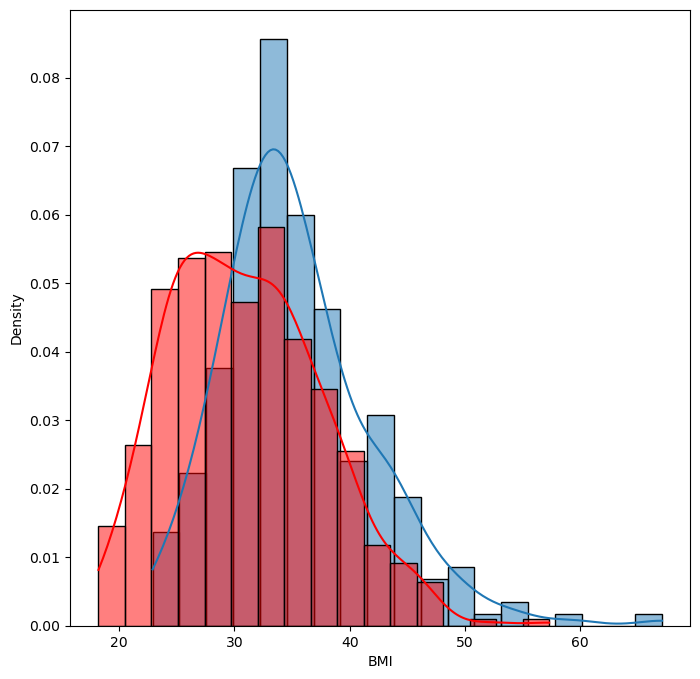

In [4]:
sns.histplot(dPos, kde=True, stat="density")
sns.histplot(dNeg, kde=True, stat="density", color='red')


### Distributions Appear to Have Some Difference - Is It Real?

Hypothesis testing can allow us to test if differences look to be real, or are likely to be determined by chance. 

This is something called a hypothesis test, and is a classic (if problematic) statistical test. Our steps will be:
<ul>
<li>Define a test statistic - whatever we are examining.
<li>Define a null hypothesis - assumption that the effect is <b>not</b> real.
<li>Compute the p-value - the probability of the null hypothesis being true. 
<li>Determine if is statistically significant - is the p-value over/under some cutoff. 
</ul><br>
Overall, if we can determine that there is an extremely small probability that the null hypothesis is true (usually <.05), we can conclude that the impact we observered is legit. 

Here, well have our test setup with:
<ul>
<li> Test statistic - the difference in the means of the BMIs. 
<li> Null Hypothesis - there is no difference between the two groups. 
<li> Overall Test - what is the likelihood of seeing the BMI means of the two groups be this different by chance? 
</ul>


## Testing - t's, z's, Sides, and Samples

There are a few varieties of hypothesis testing, and the labels often overlap and intersect:
<ul>
<li>Samples - a one sample test is to determine difference from some value. A two sample tests is comparing for a difference between two samples. 
<ul>
<li> We don't really do much on one sample tests, it is just a comparison of one sample to a fixed value, instead of another sample. E.g. is the BMI > 24. 
</ul>
<li>Sides - a one sided test only looks for if the test score is too high or too low. A two sided test looks for either too high or too low. 
<li>Z test - when we know the population variance. 
<li>T test - when we don't know the population variance. 
</ul>

<b>For the most part, we can focus on the ttest as the main tool, and look for alternatives if the situation and/or the data demands.</b>

### T-Test

The main hypothesis test we'll use is the t-test. It is a test that can evaluate if there's a difference between two samples - or more specifically, given two samples, how likely is the difference between the two to be something that may occur randomly. We are trying to establish that two groups are different, to a degree that we are very (for assorted levels of very) confident that it was not due to random chance. 

#### T-Test Sides

We can run t-tests that are labeled as either one or two sided. The difference here is that two sided t-tests compare for different (greater or lesser), while one sided tests do either greater or lesser. Depending on the scenario, either may be more useful. For example, suppose we were running a drug trial for a late stage cancer drug, and we are testing if it makes people live longer or not:
<ul>
<li> The datasets that we are using are the life expectancies of the drug and placebo groups. 
<li> The test statistic is the difference in means between the two groups. 
<li> <b>A two sided test would determine if the two groups had a difference in time alive.</b>
<li> <b>A one sided test would determine if the drug people had a greater* time alive than placebo people.</b> Presumably, it could be smaller if desired, same operation. 
</ul>

This is one thing that we generally need to be a little attentive of, in common usage you might say you're testing for a difference in two things, when you implicitly mean greater/lesser, or vice versa. 

![T-Tests](images/ttest_sides.png "T-Test")

<b>Big important note:</b> - the book examples build calculations from scratch. To do they create custom classes and functions. I'm assuming that you all haven't covered this in detail in the programming class. It isn't super complex and is worth working through, but we won't do it now. Please walk through the examples in 9.1-9.4, and then 9.5-end and try to repeat and make sense of what they are coding. We can revisit it in the future after you've done class stuff. Right now, we'll use library functions and simplified versions of the book stuff to do our tests.

### Define Test Statistic

First, we need a test statistic. For this one it will be the BMI - we want to determine if the BMI of diabetics being higher than the non-diabetics is due to chance or not? Aka is this difference statistically significant. 

<p>This will be a two sample t-test, it will be one-sided (as I phrased it) because we are specifying that we are testing if it is larger. Time for some investigation...

<b>Null hypothesis - there is no difference in BMI between diabetics and nondiabetics.</b> Or, the difference we see isn't indicitive of a real underlying difference, since it could be due to chance. 

In [5]:
#Get some basic stats
meanPos, stdPos, varPos, nPos = dPos.mean(), dPos.std(), dPos.var(), dPos.count()
print(meanPos, stdPos, varPos, nPos)
meanNeg, stdNeg, varNeg, nNeg = dNeg.mean(), dNeg.std(), dNeg.var(), dNeg.count()
print(meanNeg, stdNeg, varNeg, nNeg)

35.35099601593622 6.577284318317407 43.26066900398408 251
30.95711297071125 6.558552726769107 43.01461386981049 478


### Run T-Test

The varainaces are very close, which means that the standard t-test is valid. The difference in the means is what we will tests - is that difference likely to be real, or due to chance?

We will import the scipy package and do the test. 

In [6]:
#Scipy ttest: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
stat, pval = ss.ttest_ind(dPos, dNeg, alternative="greater")
pval

2.717898126321664e-17

In [7]:
#Check for signifigance
cutoff = .05
if pval < cutoff:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

Reject null hypothesis - Effect appears significant


### What is happening? (this is what the book part walks through)

It is similar in concept to the CI stuff we did...
<ul>
<li>Using the data to generate random trials.
<li>Counting how many exceed the test statistic
<li>If that number is high, then it is likely to be random
</ul>

So the p-value is the probability that the difference between the groups is due to randomness, the p-value cut off is the "strictness" that you put on the assessment. The default of .05 means that if there is less than a 5% chance of this difference being random, we accept that difference to be due to a real difference. More specifically, it is based on our modelling of the scenario, the difference will be [p-value] percent likely to occur randomly. 

We can do a really simple one to explore...

## Hypothesis Test, by Hand, with Simple Probabilistic Scenario

We flip a coin 100 times and get 55 Heads. Is the coin fair?

Null hypothesis - the difference in heads and tails being at least 10 is due to random chance. The book has a similar example that is built 'properly' with functions and classes - this is pretty much what it is doing. The one there is generalized - we can just add some definitions for the specific scenario and reuse the guts of the test instead of rewriting everything from scratch. 

So here we'll test the likelihood of 100 flips to yeild a difference that is 10 or larger. 

In [8]:
#Define Test Statistic
testStat = 10 #We are examining the chances that the difference from even is 10: 55 heads, 45 tails. 
#The loop below does some trials - 'flip a coin' 100 times, count up the diff between heads and tails. 
#Repeat this 100 times - that is what is in the numheads list - the 100 diffs between #heads and #tails.
#Remember - the difference part is key, we are looking for bias, so if one side shows more than the other, that's what we care about.  

numHeads = []
#Write the loop. Run 100 trials, in each one flip a coin 100 times. 
#The list above is the end result - the list of 100 differences between the #H and the #T
for i in range(100): 
    test = np.random.binomial(n=100, p=.5) #Flip a coin. 1=H, 0=T
    tmp = abs(test-(100-test))#Calculation looks weird, we just want the diff between #H and #T
    numHeads.append(tmp)

#The loop below 'checks' each trial, and counts them. We want to see how many of these random trials 
#exceeds our test statistic, or how many 100 flip trials have differences in totals of H/T that are at least 10. 
#If lots of trials have that much of a diff, there is good reason be think that the 55/45 split might be random. 
#If it rarely happens in random trials - it is probably due to something else - so we reject the NH!
#Change the teststat above and see, as the difference between H and T gets smaller, the more likely it is to be random.  
success = 0
#Write the loop. check each of the differences from the list above to see if it meets our criteria.
#If it does, increment the counter above. 
#The end result is that success vvaraible being the total count of that. 
for i in range(len(numHeads)):
    if numHeads[i] > testStat:
        success += 1
p = success/100
print("P =",p)
#Check muh Null Hyp!!
cutoff = .05
if p < cutoff:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

P = 0.3
Accept null hypothesis - Effect may be due to random chance


#### Manual T-Test Simulation Results

Above is a simplified, and non reusable version of what is going on in the book's code. Try adjusting the test statistic (difference between heads and tails) up and down, and see if the results make sense. We should probably expect to see a low p-value (difference unlikely to be random) if the test stat is big - out of 100 rolls, we'd expect that something is weird if we were to get 80 heads and 20 tails, that is unlikely to randomly occur by chance. On the other hand, if the test stat is 1, we'd expect to see a split of 51 heads to 49 tails all the time, that will very commonly happen by random variation. 

We can do a slightly more complex one - the coin flip idea is pretty simple, what if we want to test a difference in means like the first example?

## Hypothesis Test, by hand, means in two groups

NH - Is the difference in Blood Pressure between diabetics and non-diabetics significant?

If there is a real difference that causes diabetic/non-diabetics to have a different blood pressure, we should expect to see that difference (our test stat) not occur very often if you just randomly took two samples of people from the same population. If there is not a real difference, we should expect to see the same amount of difference regularly if we just took two random samples. The p-value is the measure of this likelihood - if it is small, the likelihood of the two groups differing this much in two random samples is low, so we have good reason to beleive that there really is something causing the difference. 

In [9]:
#What is the test statistic?
bpP, bpN = dfD["BloodPressure"].mean(), dfN["BloodPressure"].mean()
print(bpP, bpN)
bpDiff = abs(bpP-bpN)
print(bpDiff, '<---That is my test stat. There is a diff in BP of this much, does it matter or is this difference likely to be random chance?')
dNegBP = dfN.BloodPressure
dPosBP = dfD.BloodPressure


75.2390438247012 70.85983263598327
4.379211188717932 <---That is my test stat. There is a diff in BP of this much, does it matter or is this difference likely to be random chance?


### Data Permutation

For this one we can't really just use the probability like dice and make simple calculations. We need to do something slightly more involved. The technique we'll use is called permutation - in this contect that means we'll take all the blood pressures and mix them into one big group. 

For each of the trials, we'll then randomly shuffle them, split them into two new gorups, and count up how many times the difference between those two groups is greater than the test stat. If it is pretty common to see differences between the average blood pressure of the two random groups be large, that is an indication that the effect may be due to randomness. If it rarely happens, that is an indication that the effect is "real". 

In [10]:
#Combines the two groups.
#Get the length of one for splitting below. 
allBp = np.hstack((dNegBP, dPosBP))
n = len(dNegBP)


#### What's Happening?

We mix all the data together, then divide it randomly into two groups that are the same size as the original two groups, and compare the groups. We do this many times. Remember we are trying to establish if the difference in means between the two groups in the original data is real:
<ul>
<li> If there is truly a difference between the two groups in the original data, we would not expect that difference to show between the two randomized groups very often here, since the groups in the test are totally random. You'd expect an equal mixture of each dataset in each random grouping. 
<li> If we have a <b>real</b> difference in the two original groups, and random variation almost never generates two samples that have the same or greater difference, that is evidence that the difference is due to some real effect. 
<li> If we have a difference in the two original groups, and random variation generates two samples that have the same or greater difference regularly, that is evidence that our two original groups might not be different after all, they may just be varried due to randomness. 
<li> The <b>p-value</b> is the counter (in percentage) of this, <b>how often does the observed effect between groups occur between the randomized groups.</b> 
</ul>

This illustrates why the p-value is another piece of evidence, not a final determination. We get an estimate of how strongly we can trust that a difference is real, but from these random trials it is still possible to randomly split the data in two and see a large difference, just not likely. The p<.05 check doesn't mean that two samples are definitely different, it means that they are unlikely to be the same - the same idea, but less strong of a conclusion. 

<b>Note:</b> We are doing a two sided test here - looking for any difference. 

In [11]:
#Generate random splits, and add the differnce in their means to a list. 
diffs = []
#Write the loop. For each of 100 trials, shuffle the list of BP, then split it into two. 
#Check the difference in BP and add that value to the  list above. 
# The list of 100 diffs in BP is the final goal. 
for i in range(100):
    np.random.shuffle(allBp)
    data1 = allBp[n:]
    data2 = allBp[:n]
    tmpDiff = abs(data1.mean()-data2.mean())
    diffs.append(tmpDiff)
diffs[0:5]


[2.5050259214189197,
 0.9705112603977426,
 0.10770307889779929,
 1.1257480538098719,
 2.2464951907849695]

Each of the above is one "random split trial's" mean blood pressure difference. Now we count, of all of these groups we randomly made above, how many of those splits ended up having two groups with a difference that is as large as the one we observed between diabetics and not.  

In [12]:
#Take the differences in means from the random samples,
#Count how many times that difference exceeds our test stat. 
success = 0
#Write the loop. Just like the previous one. 
for i in range(len(diffs)):
    if diffs[i] > bpDiff:
        success += 1
p = success/len(diffs)
print("P =",p)
#Check muh Null Hyp!!
cutoff = .05
if p < cutoff:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

P = 0.0
Reject null hypothesis - Effect appears significant


#### Result

The difference of ~4.3 that we see between diabetics and non-diabetics happens approximately 0 times if we just took all those same people, shuffeled them into two groupd randomly, measured the difference in their blood pressues, and repeated that 100 times. Since this difference in the groups looks near-impossible to acheive by just randomly selecting people from a population, there is probably something causing it - a real effect. 

### T-Tests: The Easy Way vs. Simulation

The "by hand" stuff we did above is good, for several reasons, but it probably doesn't look like Z/t tests that you may have seen before. This is because those tests are Parametric - or they depend on assumptions on the distribution of the data, normal distributions in this case. Because we know the distribution information for a normal distribution, and can calculate things in terms of the mean and standard deviation, the simulation part of what we did can be replaced by just calculating the answer directly, as we can with a ttest function below. This replaces the simulated trials bit with a calculation based on the known properties of the normal distribution. 

Our simulations are more generalizable - we can use the same idea to evaluate the probability of almost anything happening. Our logic of running simulated trials and counting the results will work - the only limiitation is that the model needs to match reality. The closer our model, or the chosen analytical distribution or probability calculation, matches the reality of the scenario, the more accurate and reliable these simulations will be. In other words, when we choose a distribution (or a probability) to model our data, we are effectively declaring that "this data follows these properties", and building all future calculations on that assumption. If we choose models that do a bad job of matching our data, our estimates and projections may be well done, but that underlying error will persist. 

<b>Note:</b> The scipy function normalizes the test statistic by the amount of error, so it may not be identical. We don't really care about this detail much at all. 

<b>Note 2:</b> here we are doing the default, a two-sided test, or one that just looks for a difference between the two. This matches the comparison we did in the simulation abouve, looking for the size of the difference. Adding alternative="greater/lesser" would change the test to one that is checking if one is larger than the other specifically. 

In [13]:
#The easy way
stat, pval = ss.ttest_ind(dPosBP, dNegBP)
stat, pval

(4.60198469087467, 4.937614513410926e-06)

##### T-Tests and Permutations

The ttest function is doing an equivalent estimation to ours using some stats and calculations. It is using our knowledge on the distribution to generate our p-value. We can also tell the ttest, explicitly, to run simulations as we did. 

In [14]:
# Force Permutations
stat2, pval2 = ss.ttest_ind(dPosBP, dNegBP, permutations=100)
stat2, pval2

(4.60198469087467, 0.0)

For both versions of the calculation above, the probability of the difference being due to chance is extremely low - so we reject the null hypothesis and we can conclude that diabetics and non-diabetics have a legit difference in blood pressure. 

##### Contextual Results and Domain Knowledge 

<b>Note: as an aside, one of the things that diabetes does is as your blood glucose increases, the blood itself becomes thicker. Pumping a thicker fluid increases pressure, so this result agrees with what we know. This is also a reason diabetes does damage, the thick blood can damage smaller vessels over time.</b>

## Exercise - Try It 

Check if the difference in average GLUCOSE, BLOODPRESSURE, and/or BMI between people who have had a pregnancy vs people who have not is likely random or due to chance... 

Try to do one by hand, and the rest by using the scipy ttest function. 

In [15]:
dfP = df[df["Pregnancies"] > 0]
dfNP = df[df["Pregnancies"] == 0]

We can do Blood Pressure

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

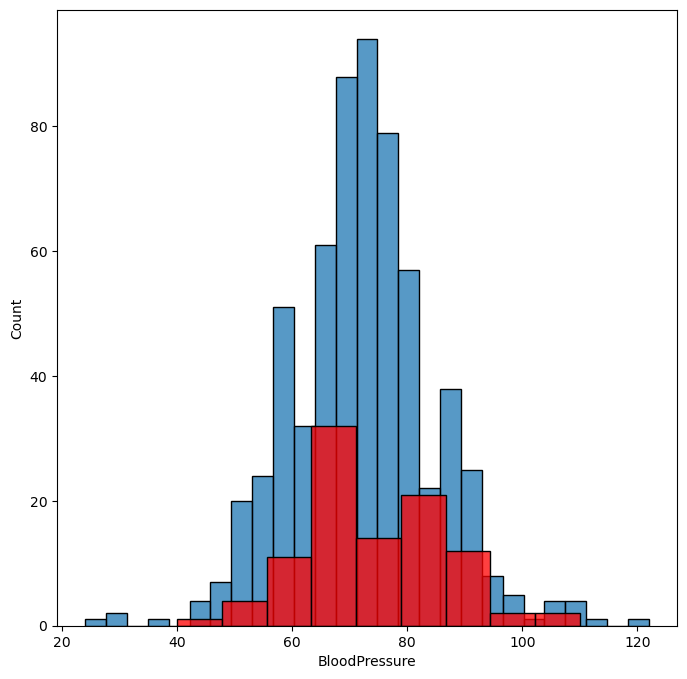

In [16]:
sns.histplot(data=dfP, x="BloodPressure")
sns.histplot(data=dfNP, x="BloodPressure", color="red")

Define test statistic

In [17]:
#What is the test statistic?
dPG = dfP.BloodPressure
dNPG = dfNP.BloodPressure

gP, gNP = dPG.mean(), dNPG.mean()
print(gP, gNP)
gDiff = abs(gP - gNP)
print(gDiff, '<---That is my test stat. There is a diff in BP of this much, does it matter or is this difference likely to be random chance?')


72.12857142857143 73.88888888888889
1.7603174603174523 <---That is my test stat. There is a diff in BP of this much, does it matter or is this difference likely to be random chance?


Try simulations

In [18]:
#Combines the two groups.
#Get the length of one for splitting below. 
allG = np.hstack((dPG, dNPG))
nP = len(dNPG)

#Generate random splits, and add the differnce in their means to a list. 
diffsP = []
#Write the loop. For each of 100 trials, shuffle the list of BP, then split it into two. 
for i in range(100):
    np.random.shuffle(allG)
    data1 = allG[nP:]
    data2 = allG[:nP]
    tmpDiff = abs(data1.mean()-data2.mean())
    diffsP.append(tmpDiff)
diffsP[0:5], "<--- Some Example Differences"


([1.7344877344877432,
  1.3746031746031804,
  0.3903318903318933,
  1.4447330447330415,
  0.5330447330447328],
 '<--- Some Example Differences')

In [19]:
#Take the differences in means from the random samples,
#Count how many times that difference exceeds our test stat. 
successP = 0
#Write the loop. Just like the previous one. 
for i in range(len(diffsP)):
    if diffsP[i] > gDiff:
        successP += 1
pP = successP/len(diffsP)
print("P =",pP)
#Check muh Null Hyp!!
cutoffP = .05
if pP < cutoffP:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

P = 0.18
Accept null hypothesis - Effect may be due to random chance


And with ttest

In [20]:
# Check Variance
np.var(dPG), np.var(dNPG)

(152.29934240362792, 154.4219977553311)

In [21]:
#The easy way
statP, pvalP = ss.ttest_ind(dPG, dNPG)
statP, pvalP

(-1.3163122369824867, 0.1884841154331154)

## Questions that People Usually Ask...

#### How much can we trust these tests? We look at the POWER...(Book 9.10)

This builds on the types of errors - false positive vs false negatives, like in a confusion matrix. 

#### What if the data isn't normal?

The above tests have an assumption that the data is normal. What if it isn't? For non-normal data we need a different type of test that is non-parametric, or does not make assumptions about the distributions, such as Mann-Whitney. 

#### What if there are 3 or more groups?

We can use ANOVA - analysis of varaince. 